<a href="https://colab.research.google.com/github/DataBoss62/BASICS-TUTORIAL/blob/main/Copy_of_Choosing_the_right_estimator_(1)_ipynb_Hemant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

### Q. Identify candidate questions for your machine learning project

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
import pandas as pd
! pip install azureml-core
! pip install azureml-dataprep

# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '284fa756-9f27-4173-8d91-0a7afbd7e46d'
resource_group = 'MachineLearningServices'
workspace_name = 'HemantML'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Police-stop-hem')
data = dataset.to_pandas_dataframe()

### Q. Generate a descriptive statistics report for the columns in your dataset

In [32]:
data.head()
data.tail()



,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
4674,Person search,2019-09-29T04:41:48+00:00,None,None,None,None,Male,over 34,Other ethnic group - Any other ethnic group,Other,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False
4675,Person and Vehicle search,2019-09-29T07:03:24+00:00,None,None,51.517032,-0.089451,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
4676,Person search,2019-09-29T08:14:12+00:00,None,None,51.505576,-0.124571,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Firearms Act 1968 (section 47),Firearms,Arrest,False,False
4677,Person search,2019-09-30T00:52:46+00:00,None,None,51.500288,-0.065312,Male,18-24,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False
4678,Person search,2019-09-30T09:01:33+00:00,None,None,51.515606,-0.094094,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679 entries, 0 to 4678
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Type                                      4679 non-null   object
 1   Date                                      4679 non-null   object
 2   Part of a policing operation              35 non-null     object
 3   Policing operation                        35 non-null     object
 4   Latitude                                  2398 non-null   object
 5   Longitude                                 2398 non-null   object
 6   Gender                                    4620 non-null   object
 7   Age range                                 4394 non-null   object
 8   Self-defined ethnicity                    4423 non-null   object
 9   Officer-defined ethnicity                 4415 non-null   object
 10  Legislation                               4635 n

In [34]:
# cardinality - count of unique values in a column
for cname in data.columns:
  print(cname + " : " + str(data[cname].value_counts().count()))

Type : 4
Date : 4447
Part of a policing operation : 1
Policing operation : 1
Latitude : 483
Longitude : 488
Gender : 4
Age range : 5
Self-defined ethnicity : 35
Officer-defined ethnicity : 5
Legislation : 9
Object of search : 12
Outcome : 16
Outcome linked to object of search : 3
Removal of more than just outer clothing : 3


In [35]:
data.describe()
#print(data.shape)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
count,4679,4679,35,35,2398,2398,4620,4394,4423,4415,4635,4587,4411,4169,4602
unique,4,4447,1,1,483,488,4,5,35,5,9,12,16,3,3
top,Person search,Date,Part of a policing operation,Policing operation,51.527286,-0.215815,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
freq,3325,35,35,35,126,126,4161,1642,988,2326,2244,2220,1773,2734,4440


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [36]:
# 4679 entries in Total
#  latitude and longitude data is missing  483/488  out of 4679   so drop columns
#  drop policing and part of policing columns by filtering out.

df1 = data.dropna(how = 'all')   #first drop all rows that contain no data

#df2 = data.drop(data.index[data['Date'] == "Date"])  # remove rows containing 'Date' in Date column
#df.drop(df.index[df['Col1'] == 0], inplace=True)

df1 = data.loc[:, ['Type',  'Gender', 'Age range', 'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation', 'Object of search', 'Outcome', 'Outcome linked to object of search', ]]

In [37]:
df1.shape

(4679, 9)

In [9]:
df1.describe()

,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search
count,4679,4620,4394,4423,4415,4635,4587,4411,4169
unique,4,4,5,35,5,9,12,16,3
top,Person search,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False
freq,3325,4161,1642,988,2326,2244,2220,1773,2734


In [38]:
#remove all rows where they are all nulls
#df2 = df1.dropna(how='all')

# fill Outcome linked ... column with Falses in place of nulls
df_missing = df1['Outcome linked to object of search'].fillna(False)
df1['Outcome linked to object of search']= df_missing
df1.head()

,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search
0,Person search,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True
1,Person search,Male,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,False
2,Person and Vehicle search,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,False
3,Person and Vehicle search,Female,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,False
4,Person and Vehicle search,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,True


In [39]:
import sklearn
sklearn. __version__

'1.0.2'

In [40]:
from pandas.core.dtypes.missing import isna
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

# trying to convert string data into numbers for the model
'''df1_col = list(df1.columns)

for i in range(len(df1_col)):
  df1[df1_col[i]] = LabelEncoder().fit_transform(df1[df1_col[i]])


#d = defaultdict(LabelEncoder)

#fit = df1.apply(lambda x: d[x.name].fit_transform(x))'''
# WHAT MANVIR HAS DONE
objList = df1.select_dtypes(include = "object").columns
print (objList)

Index(['Type', 'Gender', 'Age range', 'Self-defined ethnicity',
       'Officer-defined ethnicity', 'Legislation', 'Object of search',
       'Outcome', 'Outcome linked to object of search'],
      dtype='object')


In [41]:
le = LabelEncoder()

for feat in objList:
    df1[feat] = le.fit_transform(df1[feat].astype(str))

print (df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679 entries, 0 to 4678
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Type                                4679 non-null   int64
 1   Gender                              4679 non-null   int64
 2   Age range                           4679 non-null   int64
 3   Self-defined ethnicity              4679 non-null   int64
 4   Officer-defined ethnicity           4679 non-null   int64
 5   Legislation                         4679 non-null   int64
 6   Object of search                    4679 non-null   int64
 7   Outcome                             4679 non-null   int64
 8   Outcome linked to object of search  4679 non-null   int64
dtypes: int64(9)
memory usage: 329.1 KB
None


In [42]:
#RESULT FROM THE LOOP
df1.head(20)

,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search
0,1,2,1,9,5,4,3,10,2
1,1,2,2,31,5,4,3,8,0
2,0,2,1,9,1,4,3,16,0
3,0,0,1,9,1,4,3,8,0
4,0,2,1,31,5,4,3,15,2
5,1,2,2,26,5,4,3,8,0
6,1,2,2,31,5,6,1,8,0
7,1,0,5,34,5,6,12,15,2
8,1,2,2,34,5,6,12,16,0
9,1,2,2,31,5,6,12,16,0


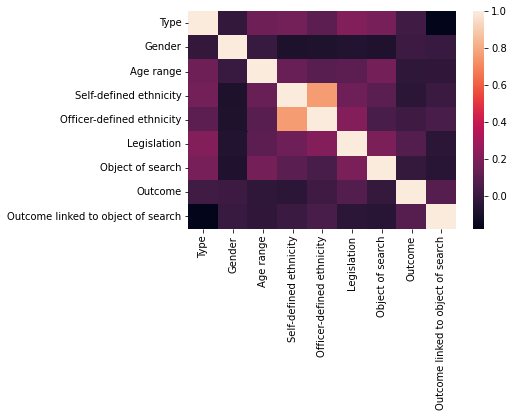

In [43]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

corr = df1.corr()
sns.heatmap(corr)

# Part 3: Model Selection

In [44]:
from sklearn.model_selection import train_test_split

x = df1.iloc[:, 1:8]
y = df1.loc[:, ['Outcome linked to object of search']]
xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

xtrain
ytrain

xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,3743.0,1.839968,0.592836,0.0,2.0,2.0,2.0,4.0
Age range,3743.0,2.215602,1.596781,0.0,1.0,2.0,4.0,5.0
Self-defined ethnicity,3743.0,23.145872,10.061175,0.0,14.0,28.0,30.0,35.0
Officer-defined ethnicity,3743.0,2.925995,2.172449,0.0,1.0,4.0,5.0,5.0
Legislation,3743.0,4.833556,1.230872,0.0,4.0,4.0,6.0,8.0
Object of search,3743.0,4.889394,3.988633,0.0,3.0,3.0,10.0,12.0
Outcome,3743.0,4.309378,4.741634,0.0,0.0,1.0,8.0,16.0


In [45]:
stats = xtrain.describe().T
xmean = stats['mean'] 
xstd = stats['std']
xmean, xstd

(Gender                        1.839968
 Age range                     2.215602
 Self-defined ethnicity       23.145872
 Officer-defined ethnicity     2.925995
 Legislation                   4.833556
 Object of search              4.889394
 Outcome                       4.309378
 Name: mean, dtype: float64, Gender                        0.592836
 Age range                     1.596781
 Self-defined ethnicity       10.061175
 Officer-defined ethnicity     2.172449
 Legislation                   1.230872
 Object of search              3.988633
 Outcome                       4.741634
 Name: std, dtype: float64)

In [46]:
norm_xtrain = (xtrain - xmean) /xstd
norm_xtest = (xtest - xmean)/ xstd

norm_xtest.head()

,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome
4390,0.269943,1.117497,0.184285,-0.426245,-3.114503,1.281293,-0.908838
4055,0.269943,1.743757,0.880029,0.954685,0.947656,1.782718,-0.908838
2104,0.269943,-0.135023,-1.107810,-0.886555,-0.677207,-0.473694,-0.697940
206,0.269943,-0.761283,-2.002338,-1.346865,-0.677207,-0.473694,0.778344
3947,0.269943,1.743757,-1.505378,-1.346865,-0.677207,-0.473694,0.145651


In [ ]:
ytrain

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [47]:
# random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# train
model.fit(norm_xtrain, ytrain)

# testing/scoring
predictions = model.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8493589743589743

In [35]:
# try another model Gaussian
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
# train
model2.fit(norm_xtrain, ytrain)

# testing/scoring
predictions = model2.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.657051282051282

In [37]:
# try another model ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
model3 = ExtraTreesClassifier()
# train
model3.fit(norm_xtrain, ytrain)

# testing/scoring
predictions = model3.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8322649572649573

# Define Algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# train
model.fit(norm_xtrain, ytrain_encoded)

# testing/scoring
predictions = model.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest_encoded)

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [48]:
# Based on Accuracy, RandomForestClassifier is best selection

from sklearn.ensemble import RandomForestClassifier
final_model = RandomForestClassifier()
final_model.fit(norm_xtrain, ytrain)
p = final_model.predict(norm_xtest)
print(accuracy_score(predictions, ytest))

from joblib import dump
dump(final_model, 'HemPoliceStop.joblib') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8493589743589743


['HemPoliceStop.joblib']

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
// This code requires the Nuget package Microsoft.AspNet.WebApi.Client to be installed.
// Instructions for doing this in Visual Studio:
// Tools -> Nuget Package Manager -> Package Manager Console
// Install-Package Newtonsoft.Json

using System;
using System.Collections.Generic;
using System.IO;
using System.Net.Http;
using System.Net.Http.Headers;
using System.Text;
using System.Threading.Tasks;
using Newtonsoft.Json;

namespace CallRequestResponseService
{
    class Program
    {
        static void Main(string[] args)
        {
            InvokeRequestResponseService().Wait();
        }

        static async Task InvokeRequestResponseService()
        {
            var handler = new HttpClientHandler()
            {
                ClientCertificateOptions = ClientCertificateOption.Manual,
                ServerCertificateCustomValidationCallback =
                        (httpRequestMessage, cert, cetChain, policyErrors) => { return true; }
            };
            using (var client = new HttpClient(handler))
            {
                // Request data goes here
                var scoreRequest = new Dictionary<string, List<Dictionary<string, string>>>()
                {
                    
                };
                

                const string apiKey = ""; // Replace this with the API key for the web service
                client.DefaultRequestHeaders.Authorization = new AuthenticationHeaderValue( "Bearer", apiKey);
                client.BaseAddress = new Uri("http://5da6bff8-3f90-4615-a032-40ed2517ae46.eastus.azurecontainer.io/score");

                // WARNING: The 'await' statement below can result in a deadlock
                // if you are calling this code from the UI thread of an ASP.Net application.
                // One way to address this would be to call ConfigureAwait(false)
                // so that the execution does not attempt to resume on the original context.
                // For instance, replace code such as:
                //      result = await DoSomeTask()
                // with the following:
                //      result = await DoSomeTask().ConfigureAwait(false)

                var requestString = JsonConvert.SerializeObject(scoreRequest);
                var content = new StringContent(requestString);

                content.Headers.ContentType = new MediaTypeHeaderValue("application/json");

                HttpResponseMessage response = await client.PostAsync("", content);

                if (response.IsSuccessStatusCode)
                {
                    string result = await response.Content.ReadAsStringAsync();
                    Console.WriteLine("Result: {0}", result);
                }
                else
                {
                    Console.WriteLine(string.Format("The request failed with status code: {0}", response.StatusCode));

                    // Print the headers - they include the requert ID and the timestamp,
                    // which are useful for debugging the failure
                    Console.WriteLine(response.Headers.ToString());

                    string responseContent = await response.Content.ReadAsStringAsync();
                    Console.WriteLine(responseContent);
                }
            }
        }
    }
}